In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.049308465471086 101.48821894465135
76.887255843865 110.64709713979215
16.244999670710627 85.71390635042701
-63.42879977879022 -4.5095319018246585
85.24436673008077 37.53333161870617
-17.32131263064693 -68.35218085152754
37.73563930960901 -121.99383977380897
-40.34539157082654 91.59990359070508
78.76820026211092 -174.8816845233464
-86.57815051822976 -69.83276968724442
9.79068707419988 -33.97877572098915
38.28490408023268 -129.16467747632822
-56.01653789650236 8.078209262378948
31.751139831404288 69.70894207867016
-70.71577750271655 67.55515548898714
-10.80422945626718 -2.5988006751219075
59.0547822454015 -119.16999733215874
19.22017844609745 105.95919887257122
-58.86396996626292 177.64113445293327
-43.821616017615426 82.42776010553916
-88.9385991190398 -155.14403645926424
-9.701814017213763 79.63635652553444
19.973762393092215 -122.24863622180536
-1.092326442027371 142.19347395144825
76.6198458174508 41.72979065331086
19.914963790139538 56.15270358591201
-84.49505888219596 -158.68266

11.07363857365037 -152.77217755793777
54.25904638774773 88.47221040148247
41.905243466610955 -103.69948526705552
-5.325043221198229 12.890325948473418
-36.88159114520038 -137.42210755646317
-69.04831451507118 122.04025417329194
45.42702145067665 -87.24364461152668
-12.374400604749184 -106.69063083406341
-41.00380323991865 -100.19161029718289
83.83736278882685 119.66110061925099
48.45907614908228 164.53451416561643
-82.22409625401636 84.40990904733906
-53.655991623229575 127.10251257738457
34.899119145868326 -79.43660614297954
65.31827470271975 -81.0691009211492
81.1738191016581 -169.61771227270833
71.87257187144189 -66.65418895859254
15.464881491782435 -179.05045822352633
-27.11081575128369 -12.601008294980005
-60.58209831058244 -33.29397091322747
6.683304850489662 -11.379633586124214
75.97619215356548 -12.368114560578903
-63.90083247355817 43.62382144467358
0.3487439543650481 -52.05750711468447
-19.101783685676608 23.94570517553211
-86.66138966694844 -169.89165881131765
-78.1549880421

In [11]:
from citipy import citipy

In [12]:
# list for holding cities
cities = []
# Identify the nearest city for each latitude and longitude combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique add it to list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

633

In [13]:
# Import requests library
import requests

# Import the API key
from config import weather_api_key

In [14]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db4265c7aa77944fd28a5e0563ef4bb1


In [15]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [16]:
# Create an empty list ot hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests. get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the dae to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("------------------------")
print("Data Retrieval Complete      ")
print("------------------------")


Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | loei
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | narasannapeta
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | vardo
Processing Record 6 of Set 1 | patacamaya
Processing Record 7 of Set 1 | san ramon
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | zhob
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | high level
Processing Record 18 of Set 1 | thanh hoa
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | mataura
Processing Record 22

Processing Record 40 of Set 4 | homer
Processing Record 41 of Set 4 | bagotville
Processing Record 42 of Set 4 | katsuura
Processing Record 43 of Set 4 | salta
Processing Record 44 of Set 4 | bowmore
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | los llanos de aridane
Processing Record 47 of Set 4 | cabedelo
Processing Record 48 of Set 4 | amahai
Processing Record 49 of Set 4 | kahului
Processing Record 50 of Set 4 | abu samrah
Processing Record 1 of Set 5 | kapaa
Processing Record 2 of Set 5 | vostok
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | maniitsoq
Processing Record 5 of Set 5 | banovce
City not found. Skipping...
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | koscierzyna
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | qaanaaq
Processing Record 11 of Set 5 | nuuk
Processing Record 12 of Set 5 | east london
Processing Record 13 of Set 5 | vila 

Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | constitucion
Processing Record 33 of Set 8 | lucapa
Processing Record 34 of Set 8 | maarianhamina
Processing Record 35 of Set 8 | batemans bay
Processing Record 36 of Set 8 | sanming
Processing Record 37 of Set 8 | san jeronimito
Processing Record 38 of Set 8 | muli
Processing Record 39 of Set 8 | wadi musa
Processing Record 40 of Set 8 | feijo
Processing Record 41 of Set 8 | churapcha
Processing Record 42 of Set 8 | zaterechnyy
Processing Record 43 of Set 8 | bryan
Processing Record 44 of Set 8 | haines junction
Processing Record 45 of Set 8 | bonavista
Processing Record 46 of Set 8 | derzhavinsk
Processing Record 47 of Set 8 | yeppoon
Processing Record 48 of Set 8 | broken hill
Processing Record 49 of Set 8 | luanda
Processing Record 50 of Set 8 | bambanglipuro
Processing Record 1 of Set 9 | san nicolas
Processing Record 2 of Set 9 | sitka
Processing Record 3 of Set 9 | vestmanna
Processing Record 4 of 

Processing Record 15 of Set 12 | markova
Processing Record 16 of Set 12 | mount isa
Processing Record 17 of Set 12 | kenai
Processing Record 18 of Set 12 | porto-vecchio
Processing Record 19 of Set 12 | zakamensk
Processing Record 20 of Set 12 | lagunas
Processing Record 21 of Set 12 | piacabucu
Processing Record 22 of Set 12 | qazanbulaq
Processing Record 23 of Set 12 | general pico
Processing Record 24 of Set 12 | yirol
City not found. Skipping...
Processing Record 25 of Set 12 | piryion
City not found. Skipping...
Processing Record 26 of Set 12 | avera
Processing Record 27 of Set 12 | kalush
Processing Record 28 of Set 12 | pasinler
Processing Record 29 of Set 12 | ronne
Processing Record 30 of Set 12 | mimongo
Processing Record 31 of Set 12 | colonia
Processing Record 32 of Set 12 | tokur
Processing Record 33 of Set 12 | sangmelima
Processing Record 34 of Set 12 | rognan
Processing Record 35 of Set 12 | viransehir
Processing Record 36 of Set 12 | bolonchen
City not found. Skipping.

In [17]:
len(city_data)

586

In [18]:
# Convert arrays to DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Loei,17.4167,101.5000,66.56,91,100,4.05,TH,2022-06-05 17:08:10
1,Saskylakh,71.9167,114.0833,33.82,77,31,13.40,RU,2022-06-05 17:08:10
2,Narasannapeta,18.4167,84.0500,83.05,90,73,12.17,IN,2022-06-05 17:08:11
3,Cape Town,-33.9258,18.4232,65.26,62,19,3.00,ZA,2022-06-05 17:08:11
4,Vardo,70.3705,31.1107,44.58,87,75,16.11,NO,2022-06-05 17:03:12
5,Patacamaya,-17.2333,-67.9167,51.69,53,98,8.28,BO,2022-06-05 17:08:11
6,San Ramon,37.7799,-121.9780,71.71,81,100,9.22,US,2022-06-05 17:08:12
7,Busselton,-33.6500,115.3333,55.56,72,100,8.37,AU,2022-06-05 17:08:12
8,Ushuaia,-54.8000,-68.3000,42.46,65,75,9.22,AR,2022-06-05 17:04:02
9,Sao Filipe,14.8961,-24.4956,76.59,69,3,8.32,CV,2022-06-05 17:08:12


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Loei,TH,2022-06-05 17:08:10,17.4167,101.5000,66.56,91,100,4.05
1,Saskylakh,RU,2022-06-05 17:08:10,71.9167,114.0833,33.82,77,31,13.40
2,Narasannapeta,IN,2022-06-05 17:08:11,18.4167,84.0500,83.05,90,73,12.17
3,Cape Town,ZA,2022-06-05 17:08:11,-33.9258,18.4232,65.26,62,19,3.00
4,Vardo,NO,2022-06-05 17:03:12,70.3705,31.1107,44.58,87,75,16.11
5,Patacamaya,BO,2022-06-05 17:08:11,-17.2333,-67.9167,51.69,53,98,8.28
6,San Ramon,US,2022-06-05 17:08:12,37.7799,-121.9780,71.71,81,100,9.22
7,Busselton,AU,2022-06-05 17:08:12,-33.6500,115.3333,55.56,72,100,8.37
8,Ushuaia,AR,2022-06-05 17:04:02,-54.8000,-68.3000,42.46,65,75,9.22
9,Sao Filipe,CV,2022-06-05 17:08:12,14.8961,-24.4956,76.59,69,3,8.32


In [20]:
# Create output file
output_data_file = "weather_data/cities.csv"
# Export
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

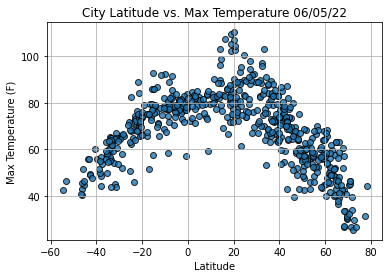

In [22]:
# Import time module
import time

# Build scatter plot for lat and lon
plt.scatter(lats, 
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

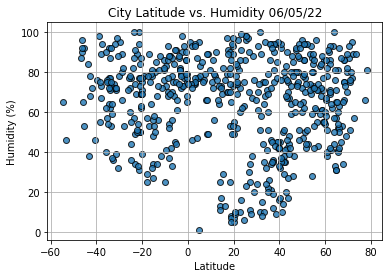

In [23]:
# Build scatter plot for lat and humidity
plt.scatter(lats, 
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

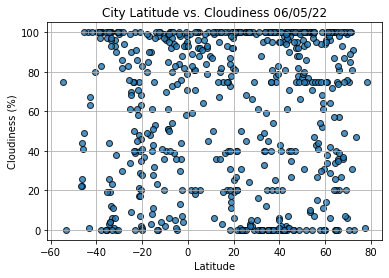

In [24]:
# Build scatter plot for lat and lon
plt.scatter(lats, 
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

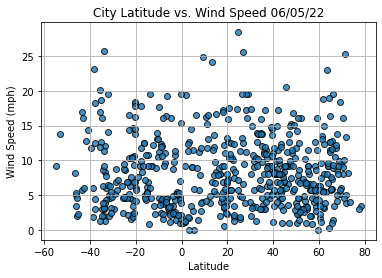

In [25]:
# Build scatter plot for lat and lon
plt.scatter(lats, 
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()